# Milestone 2

## i. Introduction

**Nama**: Arindra Jehan

**Batch**: HCK-015

**Objective**: Notebook ini ditujukan untuk membuat model Classification menggunakan Logistic Regression, Model SVC, KNN, Decision Tree, Random Forest, dan XGBoost yang dapat memprediksi apakah pasien terinfeksi penyakit AIDS atau tidak


## ii. Libraries


In [2]:
# Import Library
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Library Machine Learning Model
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
import xgboost as xgb

# Library Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import uniform, randint

# Library Outlier Handling
from feature_engine.outliers import Winsorizer
# Library Correlation
from scipy.stats import pearsonr, kendalltau, spearmanr
# Library Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Library Model Saving
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

## iii. Data Loading


### **Column Description**


| Feature   | Description                                                                                                           |
| ----------|-----------------------------------------------------------------------------------------------------------------------|
| time      | Time to failure or censoring                                                                                          |
| trt       | Treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)                                        |
| age       | Age (yrs) at baseline                                                                                                 |
| wtkg      | Weight (kg) at baseline                                                                                               |
| hemo      | Hemophilia (0=no, 1=yes)                                                                                              |
| homo      | Homosexual activity (0=no, 1=yes)                                                                                     |
| drugs     | History of IV drug use (0=no, 1=yes)                                                                                  |
| karnof    | Karnofsky score (on a scale of 0-100)                                                                                 |
| oprior    | Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)                                                                  | 
| z30       | ZDV in the 30 days prior to 175 (0=no, 1=yes)                                                                         |
| preanti   | Days pre-175 anti-retroviral therapy                                                                                  |
| race      | Race (0=White, 1=non-white)                                                                                           |
| gender    | Gender (0=F, 1=M)                                                                                                     |
| str2      | Antiretroviral history (0=naive, 1=experienced)                                                                       |
| strat     | Antiretroviral history stratification (1='Antiretroviral Naive', 2='>1 but <52 weeks of prior antiretroviral therapy', 3='> 52 weeks)                                                                                                                      |
| symptom   | Symptomatic indicator (0=asymp, 1=symp)                                                                               |
| treat     | Treatment indicator (0=ZDV only, 1=others)                                                                            |
| offtrt    | Indicator of off-trt before 96+/-5 weeks (0=no,1=yes)                                                                 |
| cd40      | CD4 at baseline                                                                                                       |
| cd240     | CD4 at 20+/-5 weeks                                                                                                   |
| cd80      | CD8 at baseline                                                                                                       |
| cd820     | CD8 at 20+/-5 weeks                                                                                                   |
| infected  | Is infected with AIDS (0=No, 1=Yes)                                                                                   |


**description** :

from the column description, we can see that the data has some **categorical columns** and **numerical columns**

In [3]:
# Make new dataset
df = pd.read_csv('AIDS_Classification_5000.csv')
# Show first 10 data
df.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0
5,1181,0,34,71.65247,0,1,0,81,0,0,...,0,1,0,0,0,413,606,952,900,0
6,592,0,43,69.93948,0,1,0,90,0,1,...,1,1,0,0,1,363,571,677,614,0
7,1061,2,36,60.91513,0,1,0,90,0,1,...,1,3,0,1,0,232,295,1985,1407,1
8,973,1,27,61.31507,0,0,0,100,0,1,...,0,3,0,1,0,478,511,806,1071,0
9,553,1,46,62.11188,0,1,0,90,0,1,...,1,3,0,1,0,268,182,1317,959,1


**description** :

showing the first 10 data

In [3]:
# Show last 10 data
df.tail(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
4990,568,0,33,83.17384,0,1,0,90,0,1,...,1,3,0,1,0,221,230,1616,1078,1
4991,1103,0,29,69.98583,0,0,0,90,0,1,...,1,2,0,1,1,305,623,1537,1150,1
4992,1120,2,41,62.59067,0,0,0,100,0,1,...,1,3,0,1,0,385,245,741,928,1
4993,1159,0,38,93.06671,0,0,0,100,1,0,...,0,1,0,1,1,351,298,544,1058,1
4994,936,0,44,68.48989,0,1,0,100,0,0,...,1,3,0,0,0,315,394,610,595,0
4995,1166,0,39,72.94446,0,1,0,100,0,0,...,1,3,0,0,0,587,285,567,929,1
4996,1137,2,33,74.98867,0,0,1,100,0,1,...,1,2,0,1,1,253,594,837,1052,0
4997,461,2,38,58.98135,0,0,0,100,1,1,...,1,3,0,1,0,184,507,1245,932,0
4998,641,2,34,73.90713,0,1,0,100,0,1,...,1,3,0,1,0,257,255,806,1050,0
4999,499,2,38,80.54048,0,1,0,100,0,0,...,0,1,0,0,0,209,408,612,512,0


**description** :

showing the last 10 data

In [4]:
# Duplicate Dataset
data = df.copy()

**description** :

making a copy of the dataset to make sure the original data is safe and unchanged

In [5]:
# Show dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

**description** :

from the info of the dataset, we can see that :
- there are `5000` entries in the dataset
- there are `23` columns in the dataset
- data shows **no null values**
- all columns are numerical, with some categorical data that have already been encoded

## iv. Exploratory Data Analysis


In [6]:
# Describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
time,5000.0,881.38240,303.774994,124.00000,552.000000,1044.50000,1136.000000,1231.00000
trt,5000.0,1.37520,1.235609,0.00000,0.000000,1.00000,3.000000,3.00000
age,5000.0,34.23980,6.985732,12.00000,29.000000,34.00000,39.000000,62.00000
wtkg,5000.0,75.94166,12.448553,44.42499,68.039777,74.00994,81.224572,142.88128
hemo,5000.0,0.03300,0.178654,0.00000,0.000000,0.00000,0.000000,1.00000
homo,5000.0,0.64800,0.477642,0.00000,0.000000,1.00000,1.000000,1.00000
drugs,5000.0,0.13700,0.343882,0.00000,0.000000,0.00000,0.000000,1.00000
karnof,5000.0,96.89340,5.013608,78.00000,90.000000,100.00000,100.000000,100.00000
oprior,5000.0,0.04060,0.197381,0.00000,0.000000,0.00000,0.000000,1.00000
z30,5000.0,0.64020,0.479990,0.00000,0.000000,1.00000,1.000000,1.00000


**description** :

from the description of the dataset, we can see that :
- there are **no null values** in the data
- there are some **ordinal and categorical data**
- there are some data that **shows a low iqr** in column `hemo`, `drugs`, `oprior`, `race`, and `symptom`, we can see in their minimum and 75% data shows the same number, they might have **low variance**

---

In [7]:
# Count duplicated data
data.duplicated().sum()

0

**description** :

there are **no duplicated data**

---

From the `column description` and `data info`, we can see that **there are some ordinal and categorical data with numerical datatypes**, so we are going to manually split the categorical and numerical columns from the data

In [8]:
# Splitting between numerical and categorical columns
num_columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
cat_columns = [col for col in data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected']
Numcerical Columns:  ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']


**description** :

After splitting the dataset, we can now move on to explore whether the numerical data has outliers

---

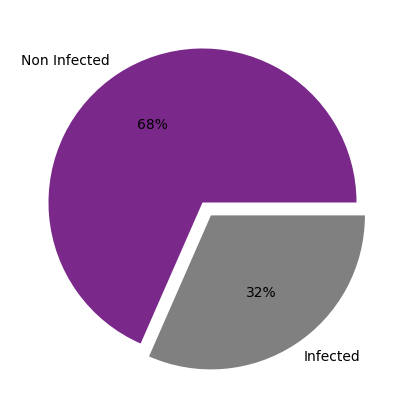

In [47]:
# Make plot pie on infected patients
fig = plt.subplots(figsize=(16, 5))
plt.pie(data['infected'].value_counts(), labels=['Non Infected', 'Infected'], explode=[0, 0.1], autopct='%.0f%%', colors=['#7A288A', '#808080'])
plt.show()

**description** :

- data of `infected patients is only 32%` compared to `non-infected patients of 68%`, this shows an **imbalanced data** that can lead to **poor model performance**

---

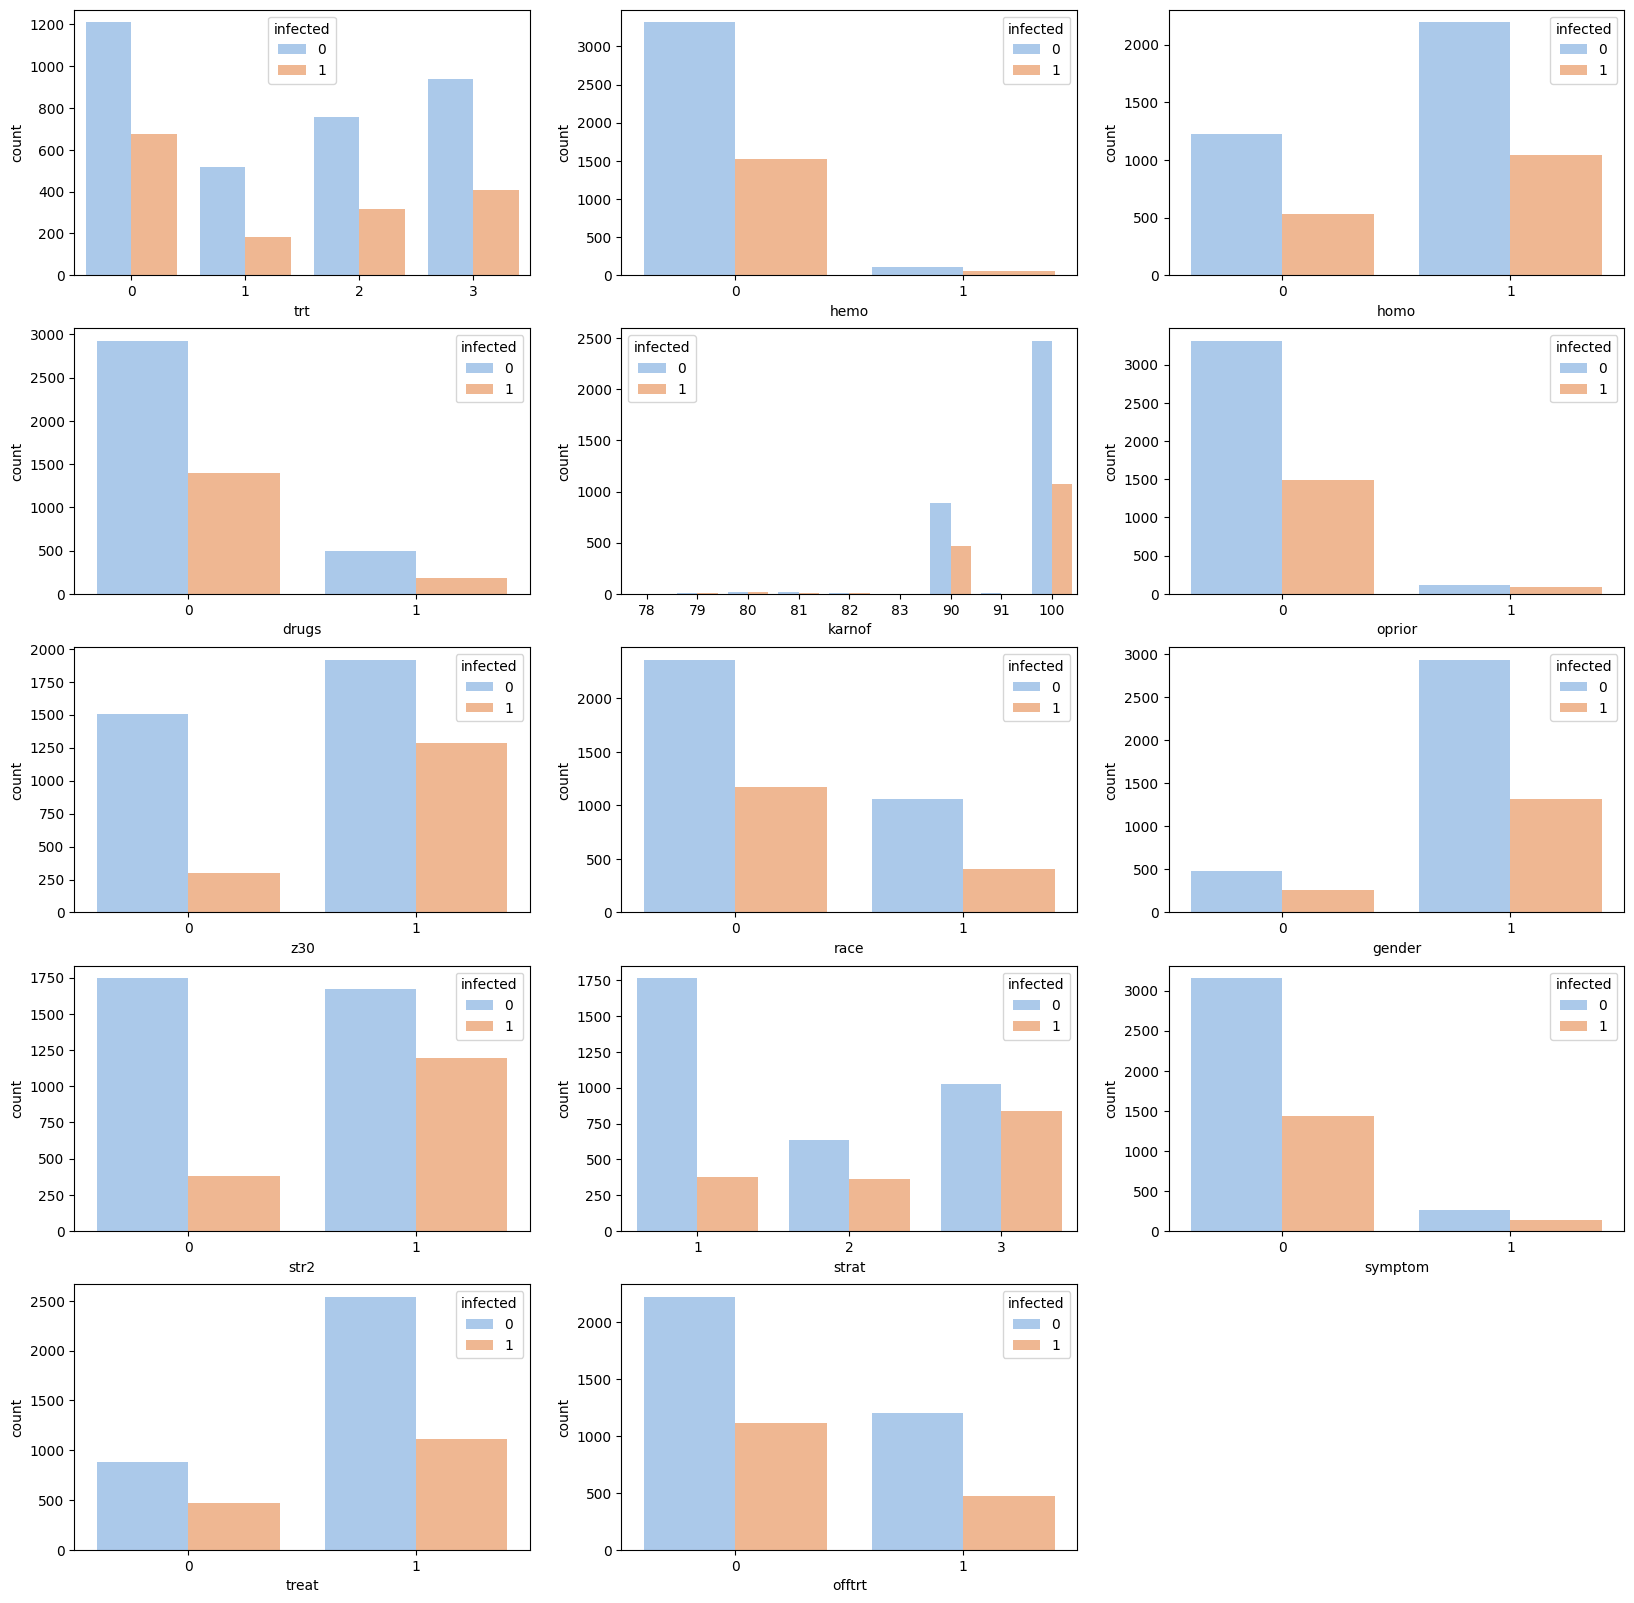

In [48]:
# Check the histogram of the categorical data
fig = plt.figure(figsize=(20, 20))
cols = cat_columns
num_rows = 5
num_cols = 3

for index in range(1, num_rows*num_cols):
    fig.add_subplot(num_rows, num_cols, index)
    sns.countplot(data=data, x=cols[index-1], hue=data['infected'], palette='pastel')
plt.show()

**description** :

Based on the figure above, we can see `infected patients` medical history, treatment, and symptoms: 

**Demographics**:

* **Race**: Majority of patients are white, with fewer non-white patients.
* **Gender**: More male patients than female patients.

**Medical History**:

* **Hemophilia**: More patients without hemophilia than with hemophilia.
* **Homosexual Activity**: More patients with no history of homosexual activity than with such history.
* **IV Drug Use**: More patients with no history of IV drug use than with such history.
* **Karnofsky Score**: Most patients have a Karnofsky score of 100.
* **Pre-175 Antiretroviral Therapy**: Most patients did not undergo Non-ZDV antiretroviral therapy pre-175.
* **ZDV Usage**: More patients with ZDV in the 30 days prior to 175 than without.

**Treatment**:

* **ZDV vs. ddI**: More patients on ZDV only treatment than ddI only treatment, followed by ZDV + Zal treatment and ZDV + ddI treatment.
* **Other Treatment**: More patients with other treatments than with ZDV only treatment.
* **Off-trt**: Most patients do not show indication of off-trt before 96+/-5 weeks.

**Antiretroviral History**:

* **Antiretroviral Experience**: More patients with antiretroviral history than naive patients.
* **Antiretroviral History Stratification**: More patients with no or less than 52 weeks of antiretroviral history than those with more than 52 weeks.

**Symptoms**:

* **Symptoms**: More asymptomatic patients than symptomatic patients.

---

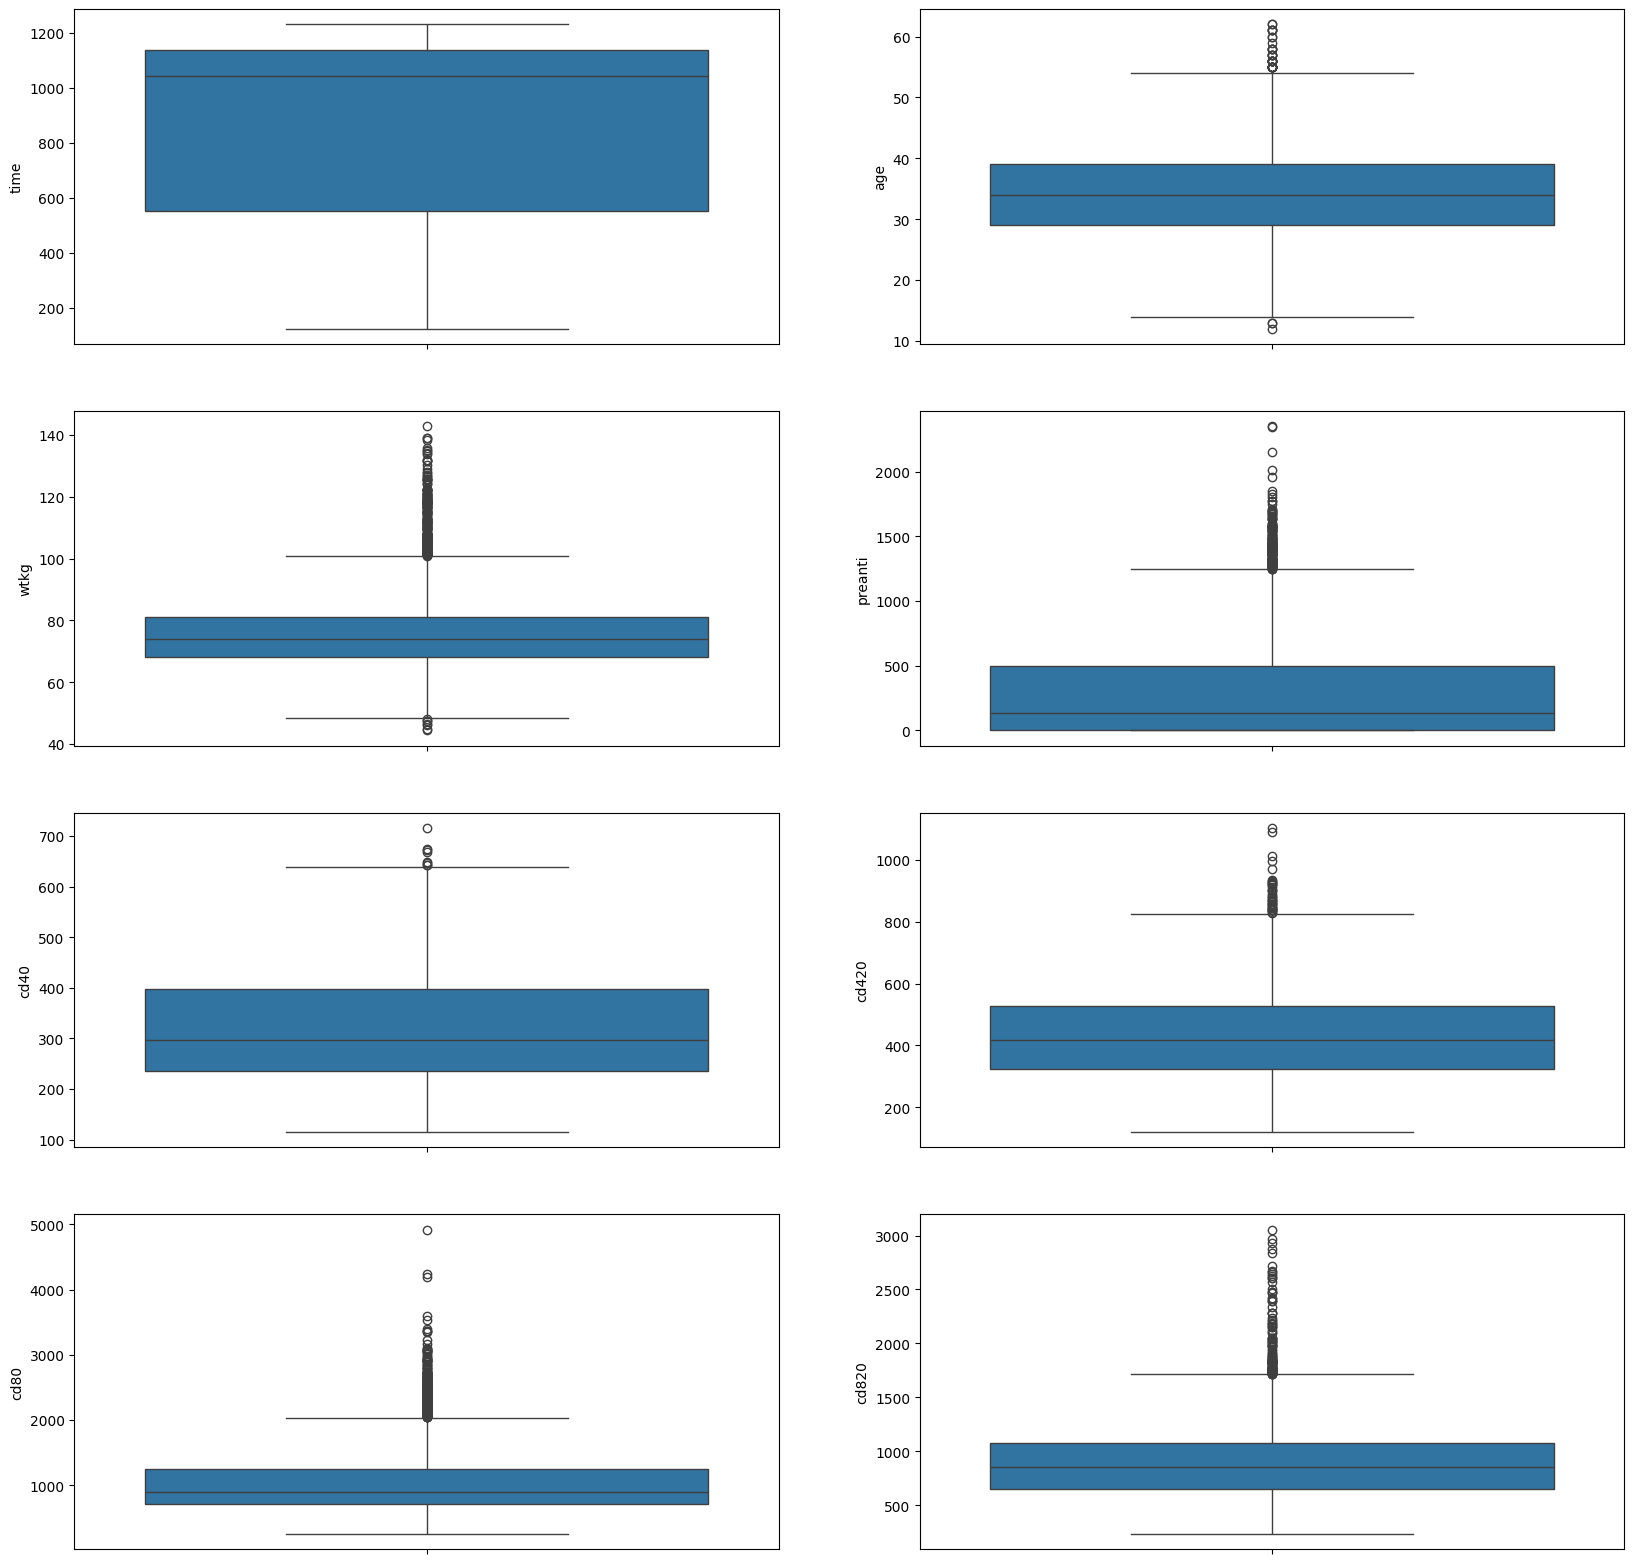

In [9]:
# Check the outliers of numerical data
fig = plt.figure(figsize=(20, 20))
cols = num_columns
num_rows = 4
num_cols = 2

for index in range(1, num_rows*num_cols+1):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxplot(data=data, y=cols[index-1])
plt.show()

**description** :

from the numerical column, we can see that :
- the data shows **many outliers** that needed to be handled

## v. Feature Engineering


### **Handling Cardinality**

In [12]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

**description** :

Because the data does not have any categorical column with **object datatypes**, there are **no Cardinality to handle**

### **Splitting Between X and Y**

In [13]:
X = data.drop('infected', axis=1)
y = data['infected']

**description** :

as we want to predict the whether or not the patient is infected with AIDS or not:
- y indicate the target --> **infected**
- x indicates the features --> any other column except for infected

### **Splitting Between Train and Test**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=43)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (4000, 22)
Test Size (1000, 22)


**description** :

- Train has **4000 entries** of data and 22 columns
- Test has **1000 entries** of data and 22 columns

### **Balancing The Data**

In **SMOTE** :

- the `sampling_strategy` parameter determines which class to oversample. We use **minority**, which means that SMOTE will generate synthetic samples for the minority class.
- the `k_neighbors` parameter determines the number of nearest neighbors to consider when generating synthetic samples. We set it to *5*, which is a common value used in practice. 
- the `random_state` parameter is used to initialize the random number generator

In [15]:
# Balancing the unique value of the target
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=43)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

y_train_balanced.value_counts()

infected
0    2752
1    2752
Name: count, dtype: int64

**description** :

After balancing the data, we can see the number of unique value from the target column is equal, this is better for the **model to learn from the minority class** in the data, which is important for medical diagnosis

### **Handling Missing Value**

In [16]:
# Check null in dataset
X_train_balanced.isnull().sum()

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

In [17]:
X_test_balanced.isnull().sum()

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

In [18]:
y_train_balanced.isnull().sum()

0

In [19]:
y_test_balanced.isnull().sum()

0

**description** :

We can see that there are some **no null values** in the data, now we can move on to the next step of feature engineering

### **Handling Outliers**

For easier handling, we are going to make a function to divide each column into a `normal distributed column`, and `a skew distributed column` with a further description into whether the column has a **low or high skewness**

In [20]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for num in num_columns:
    skewness = X_train_balanced[num].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Elif the data has low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [21]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,age,0.205458


**description** :

the table above shows that only `age` column has a **normal distribution**

In [22]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,time,-0.583218,low
1,wtkg,1.265120,high
2,preanti,1.126165,high
3,cd40,0.635738,low
4,cd420,0.710225,low
5,cd80,1.704101,high
6,cd820,1.274598,high


**description** :

the table above shows that most of the columns has **a skew distribution**

---

After dividing the column into a normal and skewed distribution, we can now move on to capping the outliers with a `gaussian` method for a **normal distributed column** and with an `iqr` method for a **skewed distributed column**

In [23]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal.fit_transform(X_train_balanced)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test_balanced)

**description** :

capping the **normal distributed column**

In [24]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
X_train_final = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_final = winsorizer_skewed.transform(X_test_capped)

**description** :

capping the **skew distributed column**

In [25]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**description** :

function to show the difference between each column before and after the outliers handling

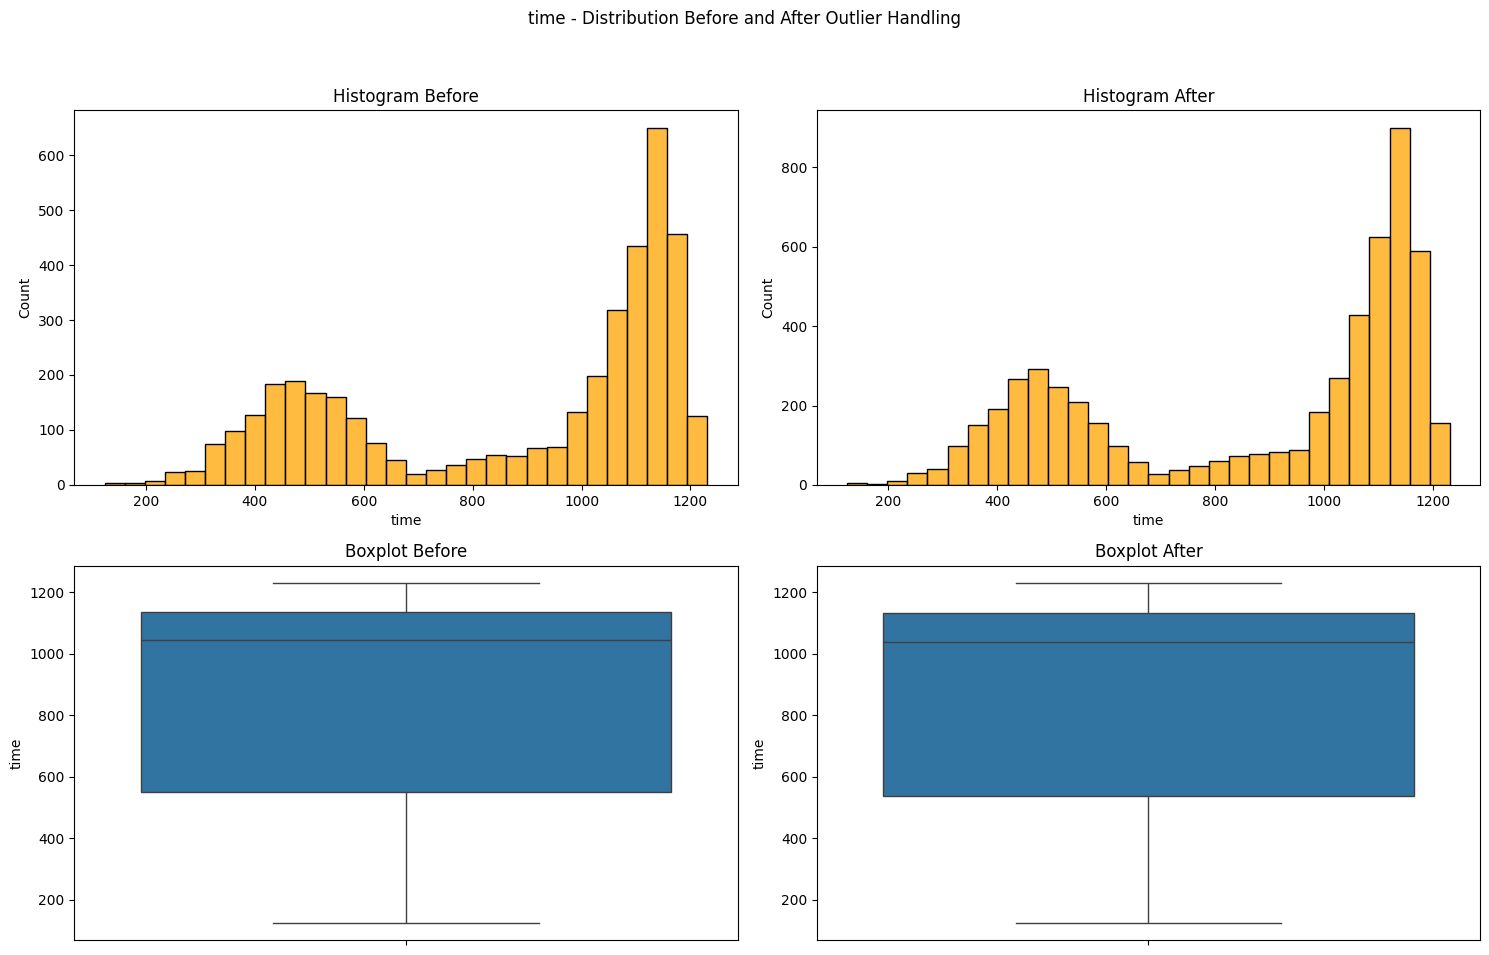

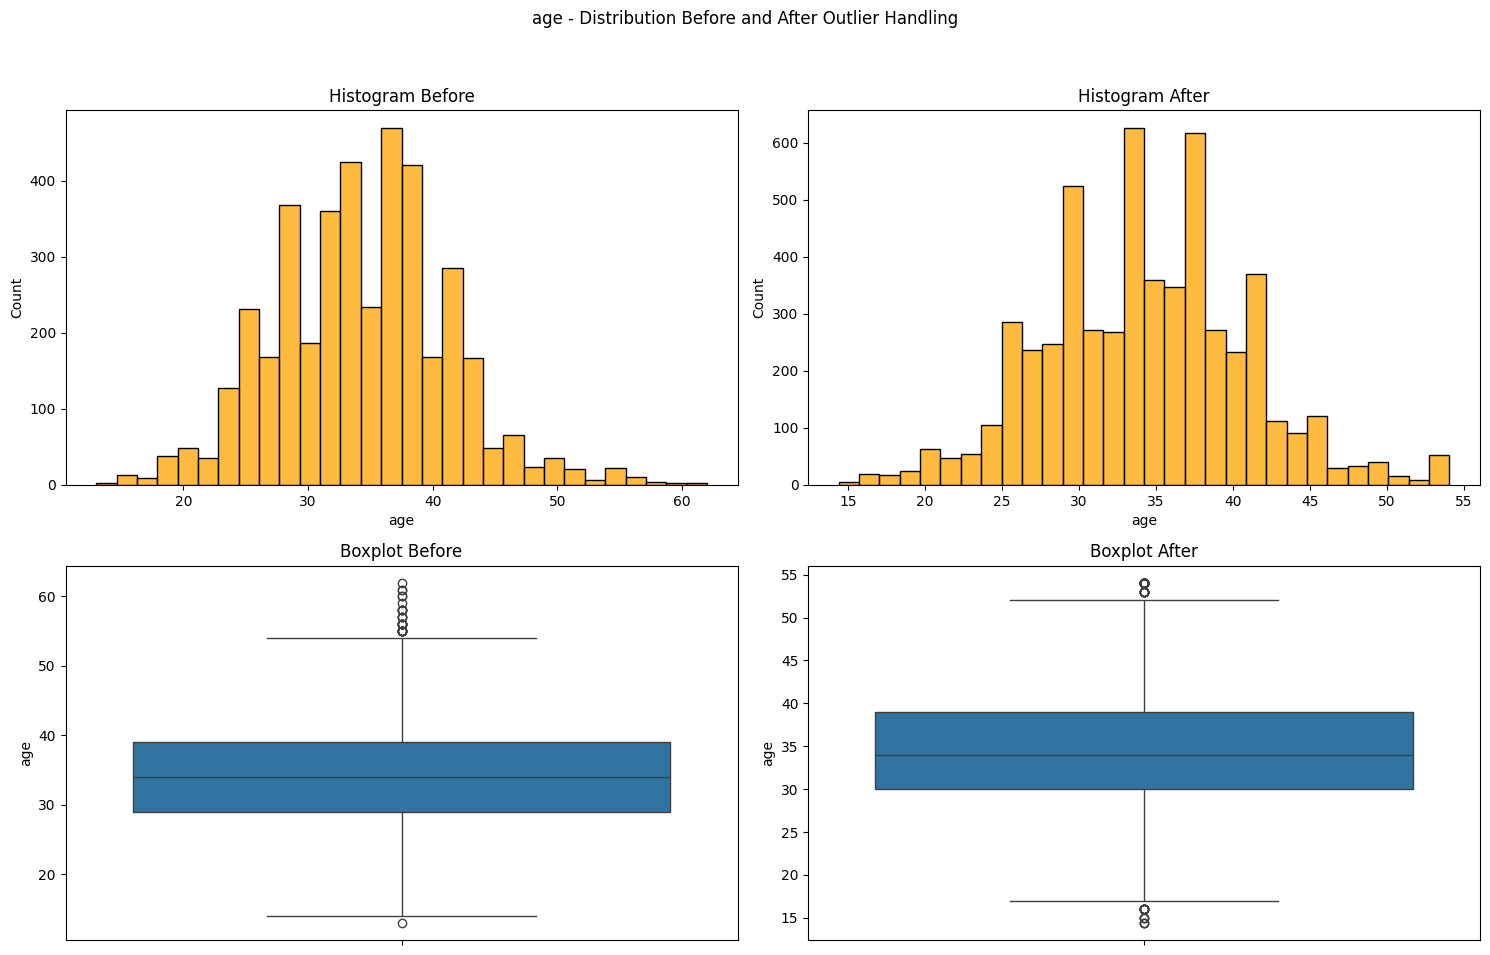

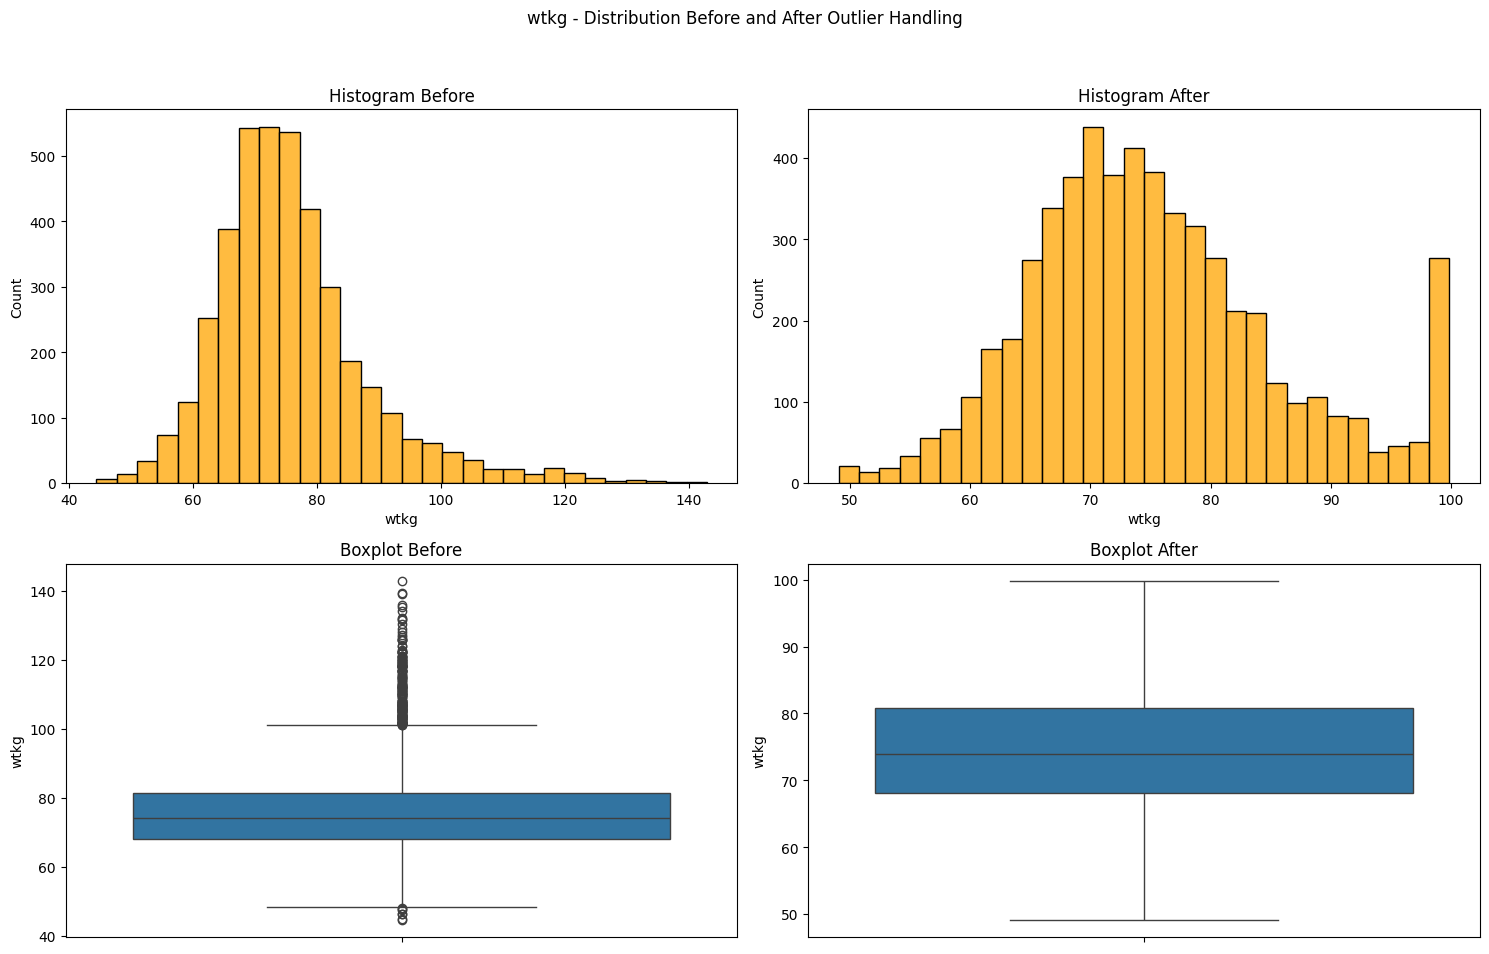

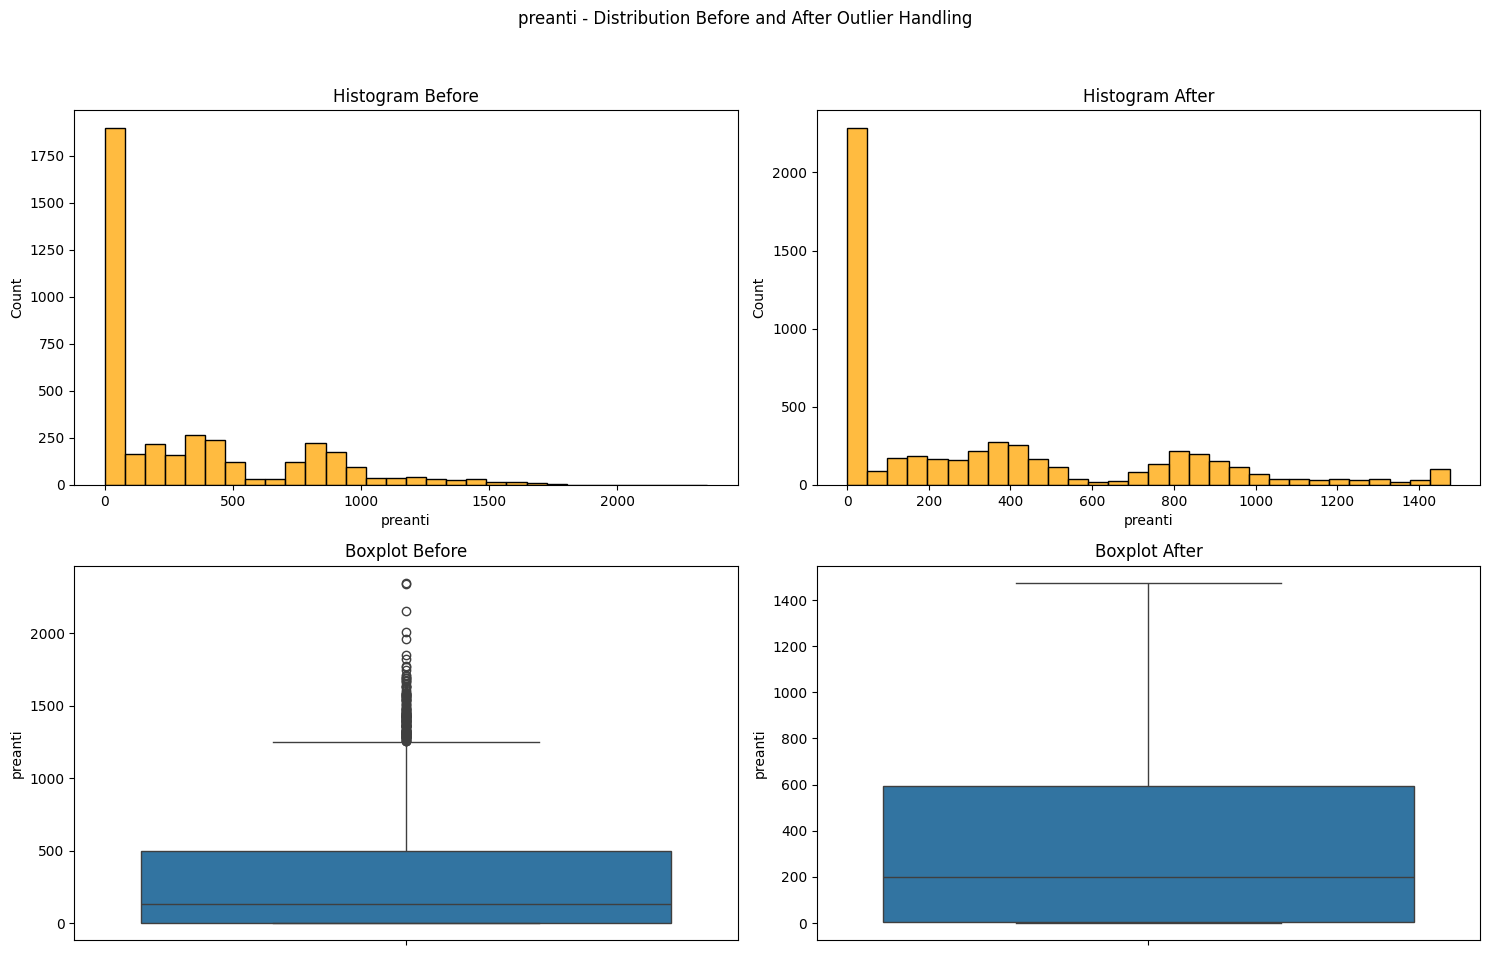

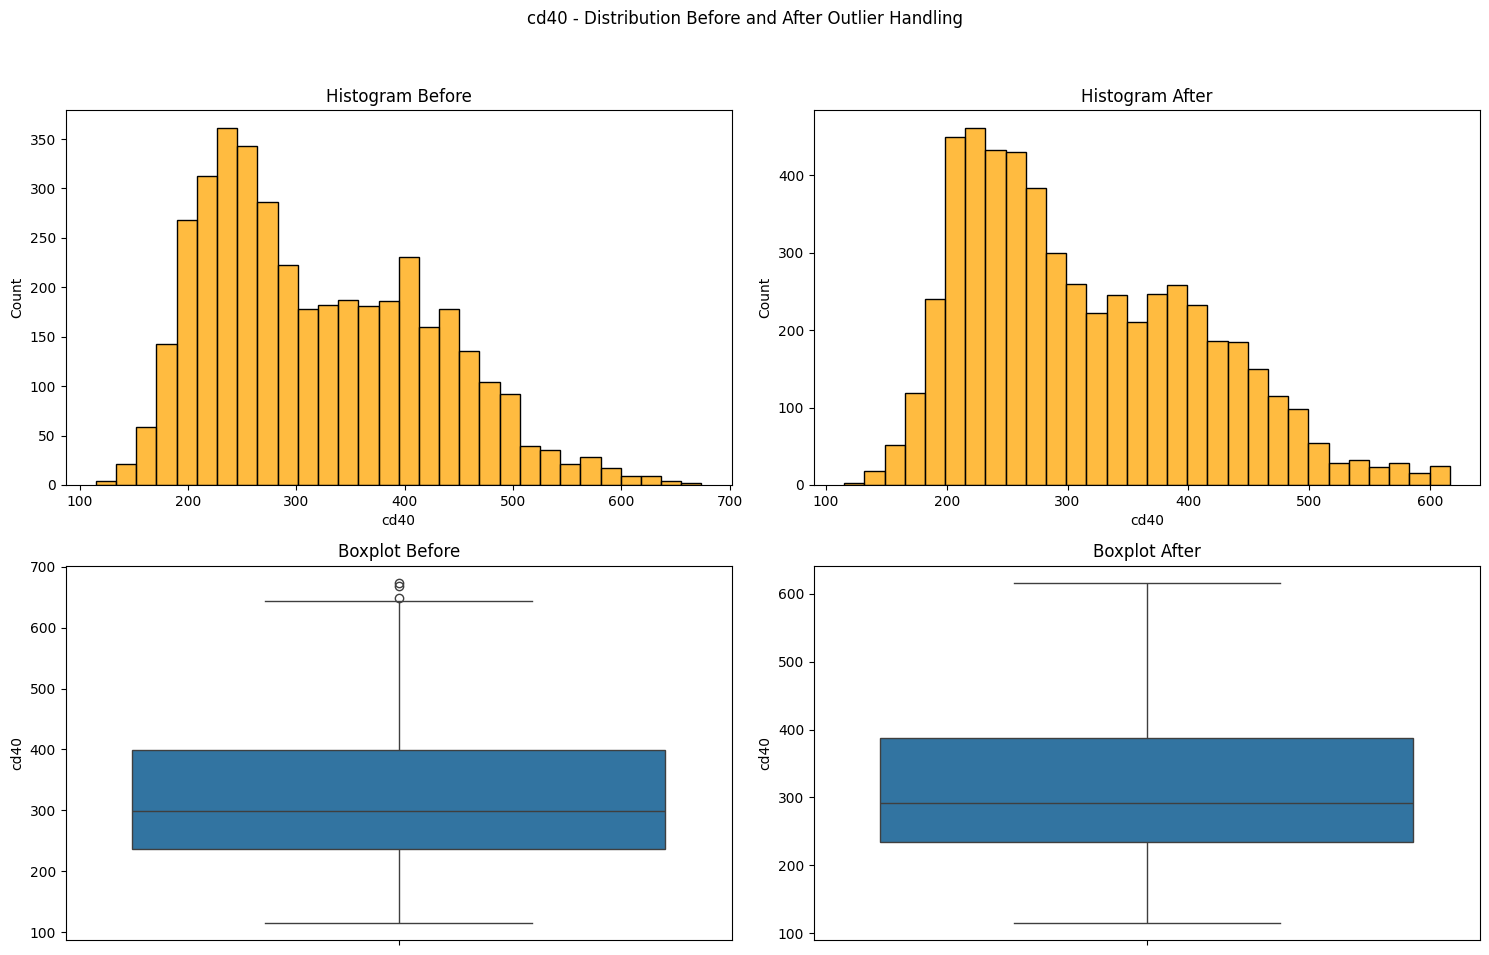

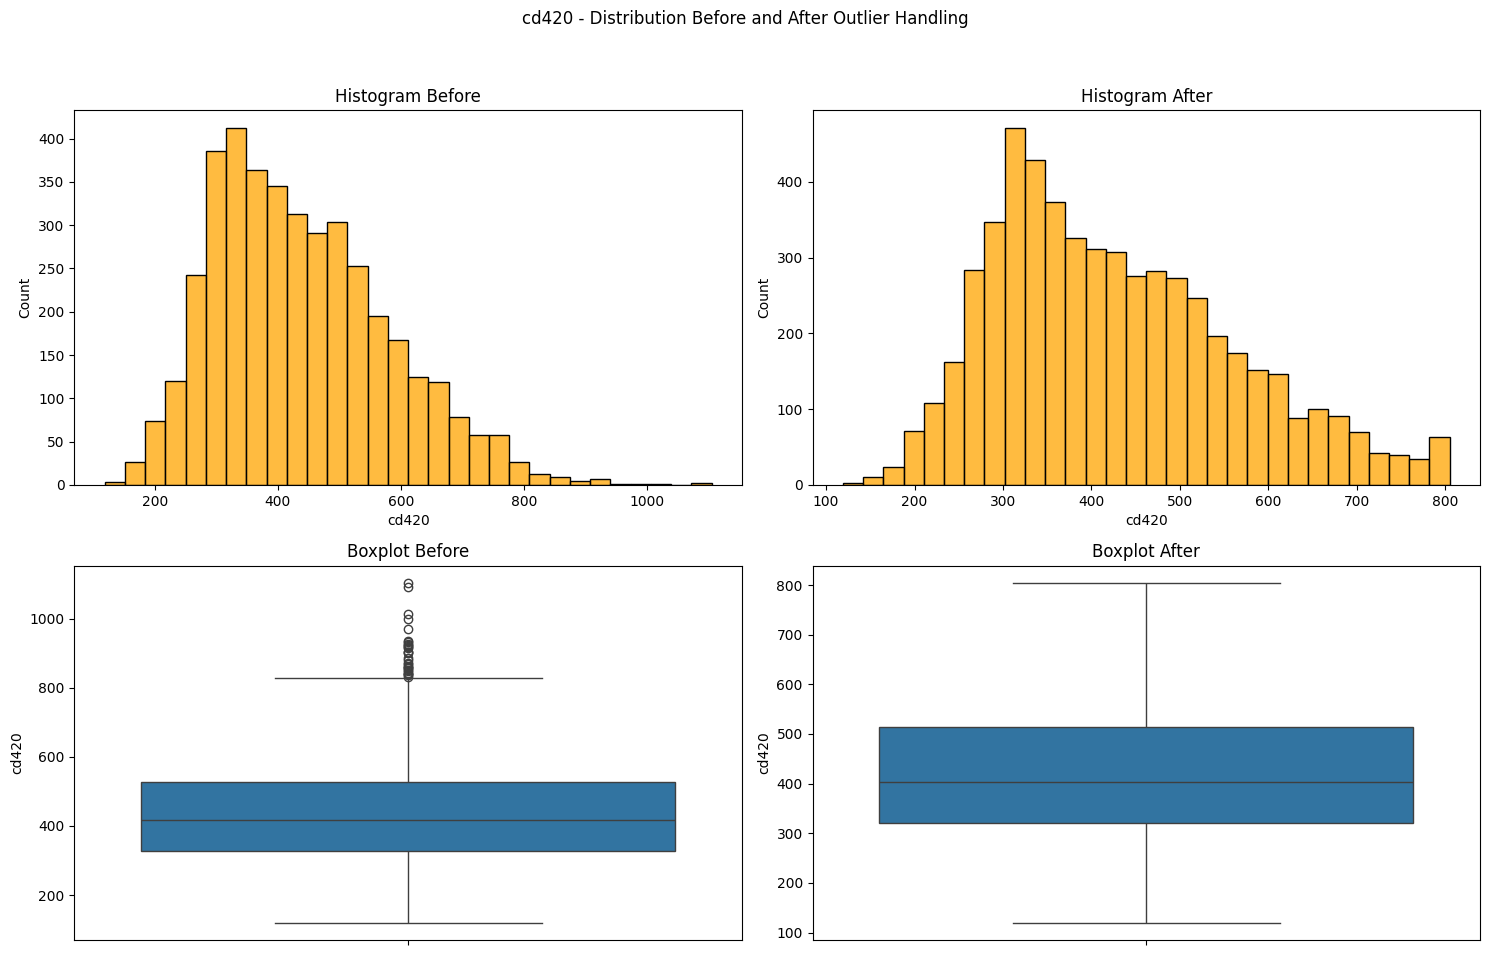

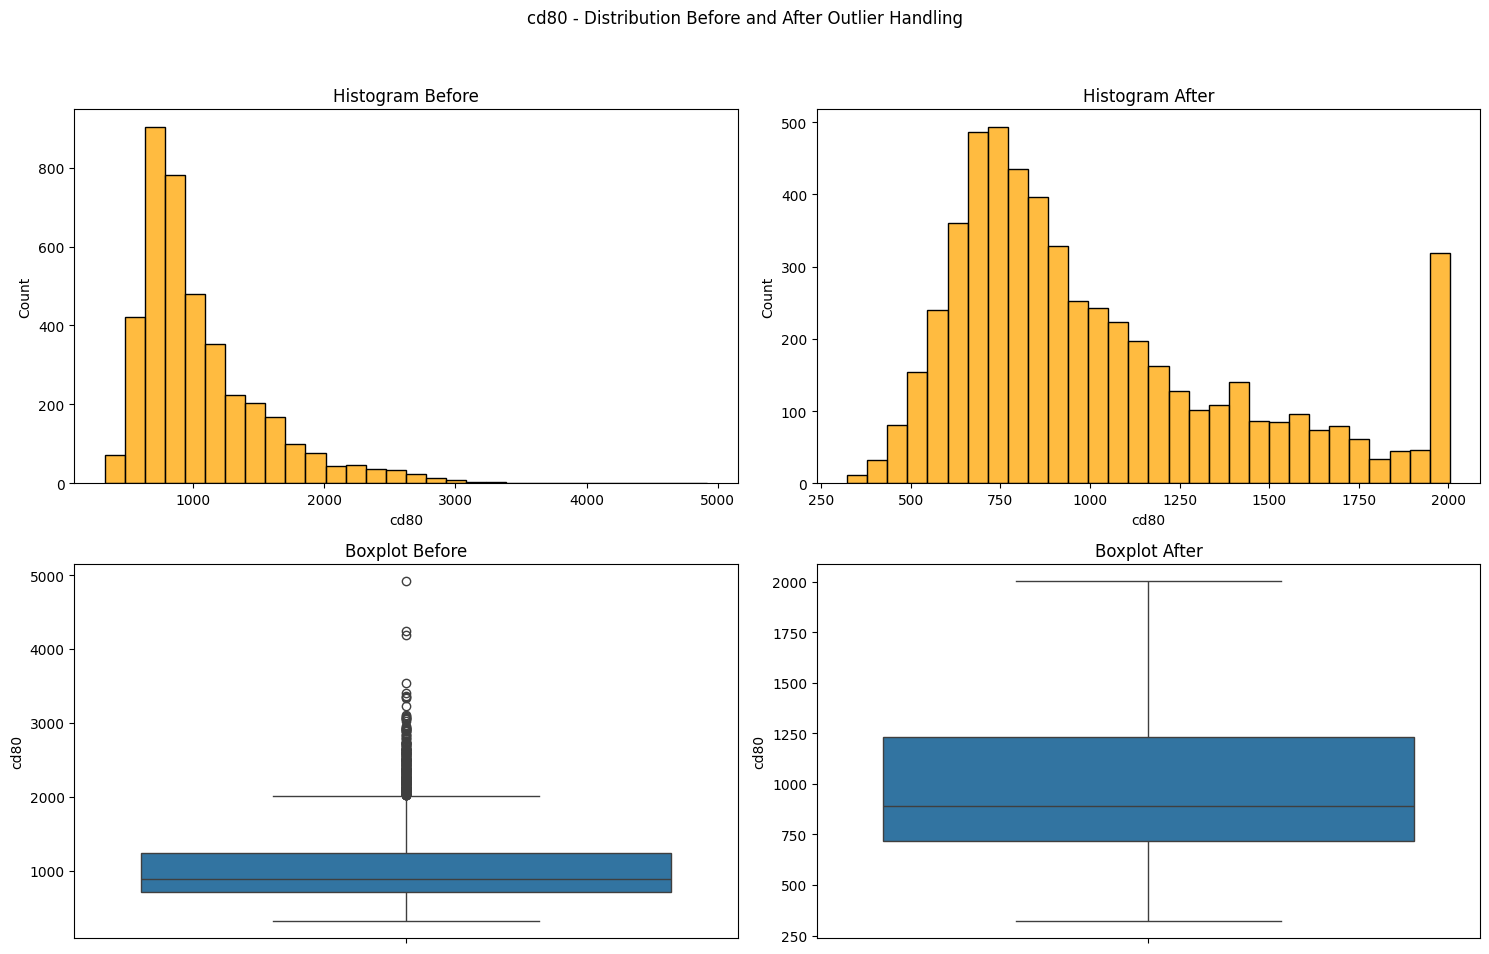

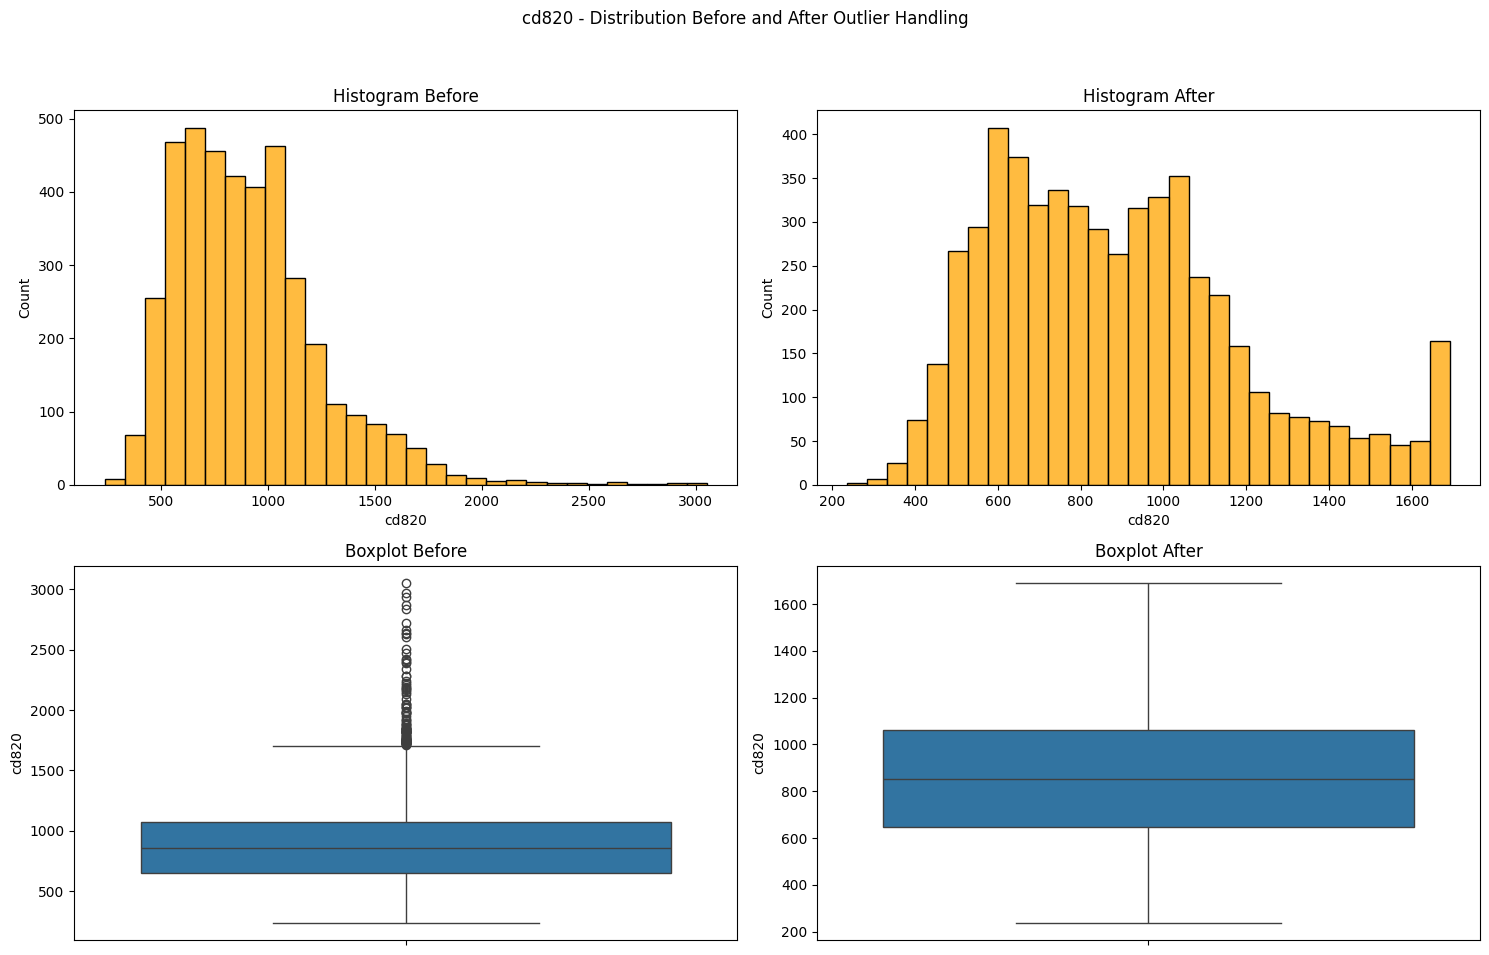

In [26]:
for num in num_columns:
    outlier_handling_plot_comparison(X_train, X_train_final, num)

**description** :

the figure above shows :
- most of the **outliers have been capped** and did not show in the figure except for column `age`
- column `age` still has some outliers but the number have been reduced

### **Splitting Numerical and Categorical Data**

After handling outliers, we are going to **split the data** into a categorical and numerical column for `feature selection`, ` feature scaling` and ` feature encoding`

In [1]:
# Splitting between numerical and categorical columns
num_columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
cat_columns = [col for col in X_train_final.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

NameError: name 'X_train_final' is not defined

In [28]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_final[num_columns]
X_train_cat = X_train_final[cat_columns]

X_test_num = X_test_final[num_columns]
X_test_cat = X_test_final[cat_columns]

X_train_cat.head()

,trt,hemo,homo,drugs,karnof,oprior,z30,race,gender,str2,strat,symptom,treat,offtrt
0,2,0,0,0,100,0,1,0,1,1,2,1,0,0
1,0,0,1,0,100,0,1,0,1,0,1,0,1,0
2,0,0,1,1,100,0,1,1,1,1,3,1,0,0
3,2,0,1,0,100,0,0,0,1,1,1,0,1,1
4,1,0,1,1,100,0,0,1,1,0,1,0,1,0


**description** :

After splitting between numerical and categorical columns, we are going to move on to ***feature selection***

### **Feature Selection**

For a correlation test between categorical data, we are going to be using the **kendall** correlation test

In [29]:
#Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train_balanced)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,trt,-0.114300,2.787962e-20,Significant
1,hemo,-0.043398,1.284834e-03,Significant
2,homo,-0.098472,2.774708e-13,Significant
3,drugs,-0.129592,7.019465e-22,Significant
4,karnof,-0.101951,1.971356e-15,Significant
5,oprior,-0.021372,1.128769e-01,Not Significant
6,z30,0.193689,8.187776e-47,Significant
7,race,-0.201559,1.508708e-50,Significant
8,gender,-0.125054,1.747073e-20,Significant
9,str2,0.204033,9.429044e-52,Significant


**description** :

table above shows which feature correlates to the target column

---

For a correlation test with a numerical data, we are going to be using the **pearson and spearman** correlation test. We are going to use the **pearson correlation** for the normal distributed columns, and **spearman correlation** for the skew distributed columns

In [30]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train_balanced)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train_balanced)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,time,-0.088610,4.538004e-11,Significant
1,age,-0.004113,7.602903e-01,Not Significant
2,wtkg,-0.040484,2.664467e-03,Significant
3,preanti,0.278623,1.093452e-98,Significant
4,cd40,-0.174796,5.169951e-39,Significant
5,cd420,-0.217219,8.848683e-60,Significant
6,cd80,-0.009501,4.809981e-01,Not Significant
7,cd820,-0.032112,1.720028e-02,Significant


**description** :

table above shows which feature correlates to the target column

In [31]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['trt', 'hemo', 'homo', 'drugs', 'karnof', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt']
['time', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd820']


**description** :

list above shows which numerical and categorical feature correlates to the target column

## vi. Pipeline

Pipelines automate the machine learning workflow, allowing data to be transformed and correlated into a model in a fully automated manner. As we want to see which classification model works best for this dataset, **pipeline can save a significant amount of time and effort**. 

There are some `steps` that we will be using in all of our pipeline models, such as :

1. **Data Preprocessing** :
    - For **`Feature Scaling`** in this pipeline, we are going to be using the `MinMax Scaler` to scale the data to a specific range, which can help normalize the data and ensure that all features have the same scale. `MinMax Scales` is useful when the features have different units or ranges, as it can prevent features with larger ranges from dominating the learning process

    - For **`Feature Encoding`** in this pipeline, the categorical column in the dataset have already been encoded. Therefore, we are going to **passthrough** the categorical column as there are nothing to encode

    - For making a **`Pipeline with Multiple Variable`**, in our case a numerical and categorical data, we are going to be using a `Column Transformer` because it allow us to **use different preprocessing steps**

2. **Model Definition** :
    - For **`Model Definition`**, we are going to be using the `SVM`, `KNN`, `Decision Tree`, `Random Forest`, and `XGBoost` model to see which model is best to fit the data

3. **Model Training** :
    - For **`Model Training`**, we are going to fit each model to the final features and balanced target

4. **Model Evaluation** :
    - For **`Model Evaluation`**, we are going to measure the `recall`, because we want to evaluate **the false negative**. We need to evaluate the false negative because if the model predict false negative, the patient with AIDS will not get any treatment

5. **Cross-Validation** :
    - For **`Cross Validation`**, we are using `10 folds` because we want to **reduce overfitting**

### **SVM**

In [32]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, SVC())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
svm_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(svm_results_df)

           Metric     Value
0    Train Recall  0.493823
1     Test Recall  0.467862
2  CV Recall Mean  0.443731
3   CV Recall Std  0.060711


**description** :

These results suggest that the `SVM model` is **performing poorly in terms of recall**, and there is significant variability in the model's performance across different subsets of the data

### **KNN**

In [33]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
knn_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(knn_results_df)

           Metric     Value
0    Train Recall  0.800145
1     Test Recall  0.648729
2  CV Recall Mean  0.702872
3   CV Recall Std  0.160849


**description** :

These results suggest that the `KNN model` is **performing reasonably well in terms of recall**, with a relatively high recall score for the training set and a moderate recall score for the test set. However, there is still some variability in the model's performance across different subsets of the data, as indicated by the standard deviation of the cross-validation recall scores

### **Decision Tree**

In [34]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
dt_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(dt_results_df)

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.609865
2  CV Recall Mean  0.693079
3   CV Recall Std  0.154680


**description** :

These results suggest that the `Decision Tree model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. The cross-validation recall scores indicate that there is some variability in the model's performance across different subsets of the data. The decision tree model **may be overfitting to the training data** based on the train recall of 1, which can lead to poor generalization performance on unseen data

### **Ensamble Learning**

Ensemble learning is a machine learning technique that **combines the predictions of multiple models** to improve the overall performance of the system. This new model often more robust and more accurate, there are two types of ensamble learning model that we are going to use :

- **Bagging** : Bagging is short for Bootstrap AGGregating. Bagging gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. `Random Forest` is a popular example of a bagging algorithm
- **Boosting** : In boosting, models are trained sequentially, with each model focusing on correcting the errors of the previous model. `XGBoost` is one of the boosting algorithm

#### **Random Forest**

In [35]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
rf_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(rf_results_df)

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.602392
2  CV Recall Mean  0.753046
3   CV Recall Std  0.190307


**description** :

These results suggest that the `Random Forest model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. However, the cross-validation recall scores indicate that the random forest model has better generalization performance compared to the decision tree model

#### **XGBoost**

In [36]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, xgb.XGBClassifier())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
xgb_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(xgb_results_df)

           Metric     Value
0    Train Recall  0.984375
1     Test Recall  0.614350
2  CV Recall Mean  0.730889
3   CV Recall Std  0.195683


**description** :

These results suggest that the `XGBoost model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. The cross-validation recall scores indicate that the XGBoost model has better generalization performance compared to the decision tree model, but its performance is slightly worse compared to the random forest model

### **Pipeline Summary**

| Model         | Recall train | Recall Test | Difference | CV Mean |
|---------------|--------------|-------------|------------|---------|
| SVM           | 0.49         | 0.46        | 0.03       | 0.44    |
| KNN           | 0.80         | 0.64        | 0.16       | 0.70    |
| Decision Tree | 1.00         | 0.60        | 0.40       | 0.69    |
| Random Forest | 1.00         | 0.60        | 0.39       | 0.75    |
| XGBoost       | 0.98         | 0.61        | 0.37       | 0.73    |

**description** :

Based on the recall scores presented in the table, the **XGBoost model has the highest recall score for the training set**, while the **KNN model has the highest recall score for the test set**. However, the difference in recall scores between the training and test sets for all models is significant, indicating that all models may be overfitting to the training data.

The cross-validation recall scores suggest that the **Random Forest model has the best generalization performance**, followed closely by the XGBoost model. The KNN model has a higher cross-validation recall score compared to the Decision Tree model, but its performance is still worse than that of the Random Forest and XGBoost models.

Eventhough **SVM is the only model thats less likely to overfit**, the model recall score and cross validation is too low compared to other models.

Therefore, based on the recall test scores presented in the table, the **KNN model is the best choice for classification**, followed closely by the XGBoost model. Additionally, hyperparameter tuning, feature engineering, and ensemble methods can be used to further improve the performance of these models.

## ix. Hyperparameter Tuning

The **hyperparameters** chosen for the K-Nearest Neighbors (KNN) classifier are:

1. **n_neighbors**: The number of nearest neighbors to consider when making a prediction. A range of values from 1 to 10 is explored, which is a reasonable range for many datasets.
2. **weights**: The weight function used to assign weights to the neighbors. Two options are explored: uniform (all neighbors have equal weight) and distance (neighbors are weighted by their distance to the query point).
3. **algorithm**: The algorithm used to compute the nearest neighbors. Four options are explored: auto (choose the best algorithm based on the dataset), ball_tree, kd_tree, and brute (a simple, brute-force algorithm).

**Grid Search** is a hyperparameter tuning method that exhaustively searches through a grid of possible hyperparameter combinations to find the best one. Grid Search ensures that all possible hyperparameter combinations are explored, which can lead to better performance than random search or other methods.

In [37]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline('passthrough') 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train_final, y_train_balanced)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_final)
y_test_pred = model_pipeline.predict(X_test_final)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_final,
                                     y_train_balanced,
                                     cv=10,
                                     scoring="recall")

# Define Hyperparameters
param_grid = {
    'kneighborsclassifier__n_neighbors': list(range(1, 11)),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, 
                           param_grid=param_grid, 
                           cv=15, 
                           scoring='recall')
grid_search.fit(X_train_final, y_train_balanced)

# Print best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_, '\n')

# Evaluate the best model
KNN_best_model = grid_search.best_estimator_

# Check Performance Model against Train-set
y_pred_train = KNN_best_model.predict(X_train_final)
y_pred_test = KNN_best_model.predict(X_test_final)

# Create a dataframe to store the results
knn_results_df = pd.DataFrame({
    'Metric': ['Train Recall Before Tuning', 'Test Recall Before Tuning', 'CV Recall Mean', 'CV Recall Std', 'Train Recall After Tuning', 'Test Recall After Tuning'],
    'Value': [recall_score(y_train_balanced, y_train_pred), recall_score(y_test_balanced, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std(), recall_score(y_train_balanced, y_pred_train), recall_score(y_test_balanced, y_pred_test)]
})

display(knn_results_df)

Best hyperparameters found:
{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'} 



,Metric,Value
0,Train Recall Before Tuning,0.800145
1,Test Recall Before Tuning,0.648729
2,CV Recall Mean,0.702872
3,CV Recall Std,0.160849
4,Train Recall After Tuning,1.000000
5,Test Recall After Tuning,0.651719


**description** :

The results show that the `KNN classifier` with the best hyperparameters achieved a recall score of **1.00 on the training set** and **0.651 on the test set**. The **cross-validation recall score was 0.702**, with a standard deviation of 0.160, indicating that the model can maintain its performance on new, unseen data, even if it has been trained on a large and diverse dataset.

Based on the train recall score after tuning, there might be a problem of overfitting. But overall, the hyperparameter tuning for the `KNN classifier` resulted in a model with **improved recall performance** on the dataset.

## x. Model Saving

In [38]:
# Save the best model pipeline for model inference
joblib.dump(KNN_best_model, 'knn_best_model_pipeline.joblib')

['preprocessing_pipeline.joblib']

**description** :

- Save the best model pipeline using joblib, which can be loaded later for model inference
- Save the preprocessing pipeline separately, which can be reused for future data preprocessing

## Conclusion

### **EDA**

**Conclusion** :

- There are **no missing value** in the data
- There are **no duplicated data**
- The data shows **many outliers** that may disrupt the model classification prediction, this needs to be handled with capping the outliers
- There are **no column that shows a low variation**, which means that all of the outliers can be handled properly
- The percentage different between non-infected(68%) and infected(32%) patient shows an **imbalanced dataset**, the low percentage of the infected patient can lead to the model performance as there are not enough training in the minority class

### **Model**

**Conclusion** :

1. **Model Recall Score and Cross Validation :**

| Model         | Recall train | Recall Test | Difference | CV Mean |
|---------------|--------------|-------------|------------|---------|
| SVM           | 0.49         | 0.46        | 0.03       | 0.44    |
| KNN           | 0.80         | 0.64        | 0.16       | 0.70    |
| Decision Tree | 1.00         | 0.60        | 0.40       | 0.69    |
| Random Forest | 1.00         | 0.61        | 0.39       | 0.74    |
| XGBoost       | 0.98         | 0.61        | 0.37       | 0.73    |

From the table above we can see that :

- `SVM` has the lowest recall score and CV score, but **less likely to overfit**
- `KNN` has the **highest recall test**, and a relatively high CV score
- `Decision Tree` and `Random Forest` seem to **overfit** the model based on the perfect recall score of 1
- `XGBoost` has the **highest recall train**, but is likely to overfit the model

Based on this, the **KNN model is the best choice for classification**, followed closely by the XGBoost model. Next, we can use hyperparameter tuning to further improve the performance of these models.

2. **KNN Hyperparameter Tuning :**

After using Grid Search, The best hyperparameters found for KNN Best Model:
* 'kneighborsclassifier__algorithm' : 'auto', 
* 'kneighborsclassifier__n_neighbors' : 9, 
* 'kneighborsclassifier__weights' : 'distance'

After using `KNN best model`, the model achieved a train recall of 1.00 and a test recall of 0.651 after hyperparameter tuning. Before tuning, the train recall was 0.800 and the test recall was 0.648. The cross-validation recall mean was 0.702 with a standard deviation of 0.160.

In conclusion, the hyperparameter tuning **improved the recall score** and **the model perform relatively well** for classification. But has a problem of overfitting the model based on the train recall score

## Recommendation

### **Model** 

**Recommendation** :

Based on the results, here are some recommendations for the KNN classification model:

1. **Reduce Overfitting**: The train recall of 1.00 and the test recall of 0.651 suggest that the model may be overfitting to the training data. To reduce overfitting, we can increase the number of neighbors, using a different distance metric, or applying regularization techniques.
2. **Feature Engineering**: In this model, we only use MinMaxScaler for scaling, in the next model we can use StandardScaler for scaling, and OneHotEncoder for encoding the data, we can also use PCA to help reduce the dimensionality of the data and improve the model's performance.
3. **Imbalanced Data**: In this model, we use SMOTE to balance the data, in the next model we can consider using techniques such as oversampling or undersampling to balance the data. This can help to improve the model's performance and prevent it from being biased towards the majority class.
4. **Model Evaluation**: Evaluate the model using different metrics such as accuracy, precision, and F1 score. This can help to provide a more comprehensive evaluation of the model's performance and identify its strengths and weaknesses.

By implementing these recommendations, the KNN classification model can be improved and optimized for better performance.

### **Business** 

**Recommendation** :

1. **Early Detection and Prevention**: Implement the KNN model as a screening tool for early detection and prevention of AIDS. By identifying patients who are at high risk of infection, healthcare providers can take proactive measures to prevent the spread of the disease.
2. **Patient Education**: Provide education and counseling to patients who are at high risk of infection. This can include information about safe sex practices, needle exchange programs, and the importance of regular testing.
3. **Healthcare Provider Training**: Train healthcare providers on how to use the KNN model and interpret its results. This can help ensure that patients receive accurate and timely diagnoses.
4. **Data Collection and Analysis**: Continuously collect and analyze data on AIDS cases and use this information to improve the KNN model. This can include collecting data on demographics, risk factors, and treatment outcomes.
5. **Collaboration with Public Health Agencies**: Collaborate with public health agencies to share data and best practices for AIDS prevention and treatment. This can help improve the overall health of the community and reduce the spread of the disease.
6. **Cost-Benefit Analysis**: Conduct a cost-benefit analysis to determine the financial benefits of using the KNN model for AIDS screening. This can include calculating the cost savings associated with early detection and prevention, as well as the potential revenue generated from providing AIDS treatment services.
7. **Continuous Improvement**: Continuously monitor and improve the KNN model to ensure that it remains accurate and effective. This can include testing the model on new datasets, incorporating new features, and adjusting the model parameters as needed.

By implementing these recommendations, healthcare providers can use the KNN model to improve AIDS screening and prevention efforts, ultimately leading to better health outcomes for patients and the community as a whole.

## Conceptual Problems

*Jawab pertanyaan berikut:*

1. **Latar belakang adanya bagging dan cara kerja bagging :**

Bagging atau Bootstrap Aggregating adalah teknik ensemble learning yang dikembangkan oleh Leo Breiman pada tahun 1996. Bagging digunakan untuk mengurangi variance dan overfitting pada model machine learning.

Cara kerja bagging adalah sebagai berikut:

- Bagging membuat beberapa subset dari data training menggunakan metode resampling dengan gantian (bootstrap sampling).
- Setiap subset data tersebut digunakan untuk membuat model machine learning yang terpisah.
- Hasil prediksi dari setiap model terpisah diaggregasi menggunakan metode voting atau averaging.
- Dengan menggunakan bagging, kita dapat mengurangi variance dan overfitting pada model machine learning, serta meningkatkan stabilitas dan akurasi dari model.

2. **Perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih :**

Berikut adalah beberapa perbedaan antara algoritma Random Forest dan algoritma boosting XGBoost:

- Paralel vs Serial: Algoritma Random Forest mempelajari beberapa pohon decision tree secara paralel, sedangkan algoritma boosting XGBoost mempelajari beberapa pohon decision tree secara serial.
- Pelatihan pohon decision tree: Algoritma Random Forest mempelajari beberapa pohon decision tree dengan menggunakan seluruh data latih, sedangkan algoritma boosting XGBoost mempelajari beberapa pohon decision tree dengan menggunakan data latih yang diresampling dari data latih sebelumnya.
- Regularisasi: Algoritma boosting XGBoost memanfaatkan regularisasi untuk mengurangi overfitting dan meningkatkan stabilitas dan akurasi dari model.
- Optimisasi performa: Algoritma boosting XGBoost memanfaatkan beberapa teknik optimisasi performa, seperti parallel processing, tree pruning, dan cache optimization.

3. **Apa yang dimaksud dengan Cross Validation?**

Cross validation adalah teknik evaluasi model machine learning yang digunakan untuk mengukur kinerja model dengan akurat dan objektif. Cross validation membagi data menjadi beberapa subset, dan setiap subset digunakan sebagai data validasi sementara yang lain digunakan sebagai data latih.

Terdapat beberapa jenis cross validation, yaitu:

- Holdout validation: Membagi data menjadi dua subset, yaitu data latih dan data validasi.
- K-fold cross validation: Membagi data menjadi k subset, dan setiap subset digunakan sebagai data validasi sedangkan yang lain digunakan sebagai data latih.
- Leave-one-out cross validation: Membagi data menjadi n subset, dan setiap subset hanya berisi data satu, yang lain digunakan sebagai data latih.

Cross validation dapat membantu mengurangi bias dan variance pada model, serta meningkatkan stabilitas dan akurasi dari model.